In [1]:
import os
import pandas as pd
import sys
import json
from google.protobuf.json_format import Parse

sys.path.insert(0, 'compiled_protobufs')
from taskmap_pb2 import TaskMap

qrels_folder = os.path.join(os.getcwd(), 'measurements', 'judgments')
run_cooking_folder = os.path.join(os.getcwd(), 'measurements', 'cooking', 'run_files')
# run_diy_folder = os.path.join(os.getcwd(), 'measurements', 'diy', 'run_files')
cooking_runs = os.listdir(run_cooking_folder)
cooking_qrels = os.path.join(qrels_folder, "cooking.qrels")

queries = {
    "COOKING" : pd.read_csv('queries/cooking.csv'),
    "DIY": pd.read_csv('queries/diy.csv'),
}


In [4]:
from results_helper import get_all_metrics, get_all_metrics_searcher

# results = {}
# for searcher in cooking_runs:
#     run = os.path.join(run_cooking_folder, searcher)
#     searcher_name = searcher[:-4].lower()
#     accuracy = get_accuracy(run, cooking_qrles)
#     results[searcher_name] = accuracy
#     # print(searcher_name, accuracy)
# df = pd.DataFrame(results).transpose()
# df
path = "/home/ubuntu/task-search-quality/measurements/cooking/analysis/all-metrics"

get_all_metrics(run_cooking_folder, cooking_qrels, path, with_t5=True)
# get_all_metrics_searcher(run_cooking_folder, cooking_qrels, path, s_name="marqo")

P@10      R@50  Judged@50    nDCG@3      R@20    nDCG@5  \
tct-colbertv2+t5  0.818  0.425102     0.3808  0.783546  0.329908  0.764184   
ance+t5           0.817  0.386045     0.3494  0.793757  0.313142  0.771311   
bm25+rm3+t5       0.717  0.359124     0.3930  0.671523  0.289515  0.651944   
bm25+t5           0.733  0.369085     0.4058  0.675215  0.301339  0.654600   
marqo+t5-raw      0.711  0.288889     0.2750  0.677463  0.246209  0.660499   
marqo+t5          0.802  0.324187     0.3006  0.750162  0.277692  0.733888   

                   nDCG@10        AP       P@3  Judged@10      R@10    P@5  \
tct-colbertv2+t5  0.739937  0.343017  0.873333      0.998  0.237026  0.856   
ance+t5           0.736300  0.315525  0.880000      0.999  0.238747  0.856   
bm25+rm3+t5       0.609310  0.276763  0.800000      1.000  0.215727  0.776   
bm25+t5           0.625703  0.285112  0.810000      1.000  0.222119  0.772   
marqo+t5-raw      0.622556  0.232146  0.773333      0.883  0.204181  0.768   
marqo+t5          0.698631  0.269389  0.863333      1.000  0.234509  0.850   

                  Judged@20  
tct-colbertv2+t5     0.6965  
ance+t5              0.6690  
bm25+rm3+t5          0.7030  
bm25+t5              0.7135  
marqo+t5-raw         0.5385  
marqo+t5             0.5960

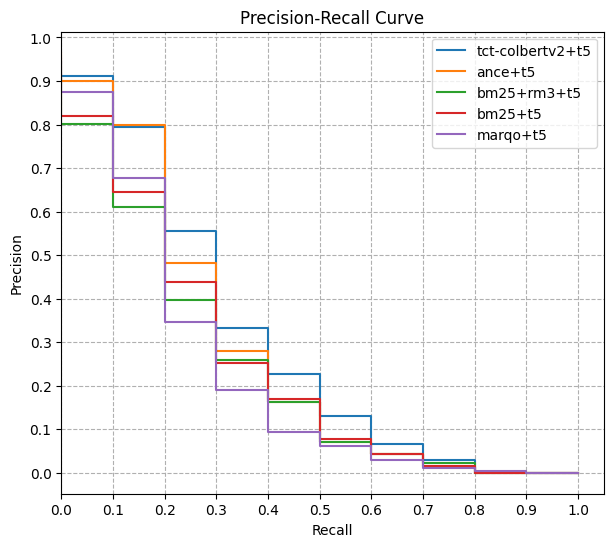

In [12]:
from results_helper import get_precision_recall_graph

get_precision_recall_graph(run_cooking_folder, cooking_qrels, with_t5 = True)

In [19]:
from results_helper import get_metrics, get_raw_query
from ir_measures import *  

queries = pd.read_csv("/home/ubuntu/task-search-quality/queries/cooking.csv")  

t5_vals = [False, True]
for t5 in t5_vals:
    ap_vals = get_metrics(run_cooking_folder, cooking_qrels, AP, t5)
    recall_vals = get_metrics(run_cooking_folder, cooking_qrels, Recall@50, t5)
    ndcg_vals = get_metrics(run_cooking_folder, cooking_qrels, nDCG@10, t5)
    ndcg_vals3 = get_metrics(run_cooking_folder, cooking_qrels, nDCG@3, t5)
    ndcg_vals5 = get_metrics(run_cooking_folder, cooking_qrels, nDCG@5, t5)
    

    results = {}
    results["COOKING"] = {
        "MAP": ap_vals,
        "Recall@50": recall_vals,
        "Ndgc@10": ndcg_vals,
        "Ndgc@3": ndcg_vals3,
        "Ndgc@5": ndcg_vals5,
    }

    analysis_folder = "/home/ubuntu/task-search-quality/measurements/cooking/analysis"
    
    if t5:
        analysis_folder += "/t5-results"
    else:
        analysis_folder += "/non-t5-results"
    if not os.path.exists(analysis_folder):
        os.mkdir(analysis_folder)

    for metric, df in results["COOKING"].items():
        pivoted_df = df.pivot(index='query_id', columns='model', values='metric_val').reset_index()
        pivoted_df["query"] = pivoted_df.apply(lambda x: get_raw_query(x, queries), axis=1)
        pivoted_df.to_csv(os.path.join(analysis_folder, metric+".csv"), index=False)

pivoted_df.head()

model  query_id  TCT-ColBERTv2+t5   ance+t5  bm25+rm3+t5   bm25+t5  marqo+t5  \
0       query-0          0.851630  0.851630     0.773468  0.773468  0.646382   
1       query-1          0.330420  0.701224     0.500000  0.458609  0.565603   
2      query-10          0.691783  0.808217     0.684352  0.795761  0.650393   
3      query-11          1.000000  0.868795     0.361363  0.084790  0.339160   
4      query-12          0.934397  0.934397     0.065603  0.084790  0.776573   

model                                         query  
0                        how to spatchcock a turkey  
1      I want an easy to make dessert for christmas  
2                 recommend some asian street foods  
3                                 dinners by batali  
4                         traditional japanese soup

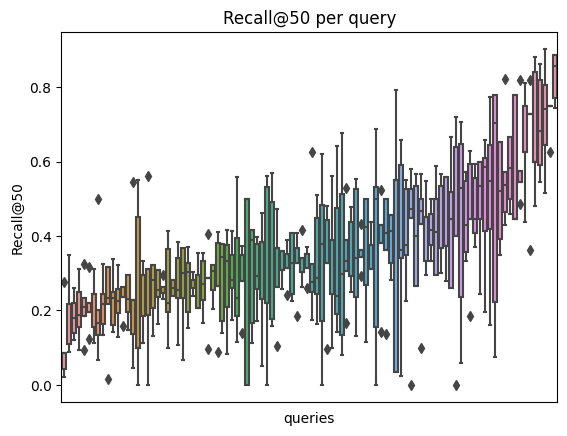

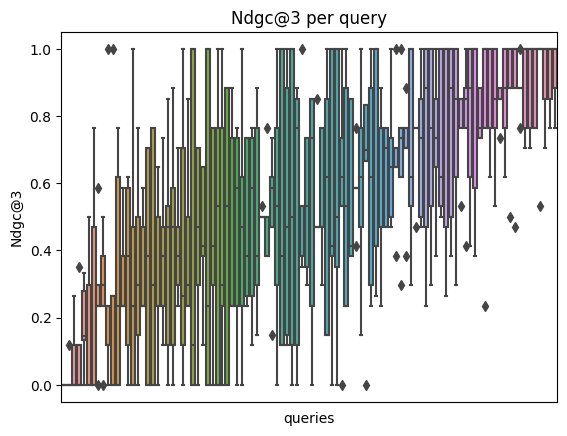

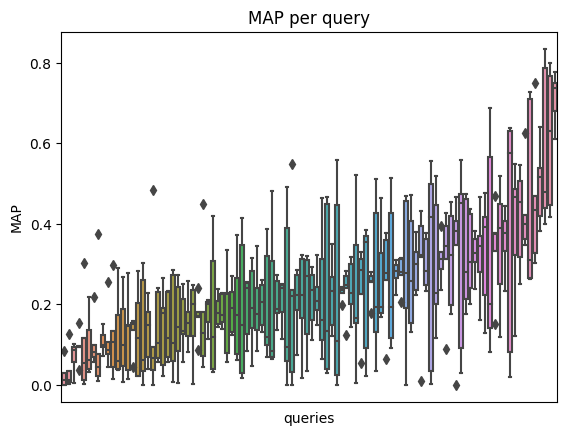

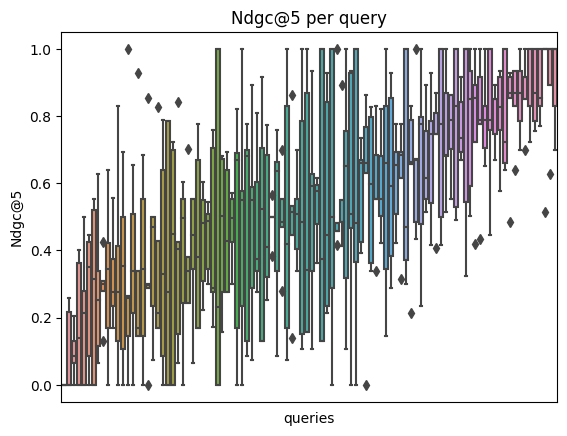

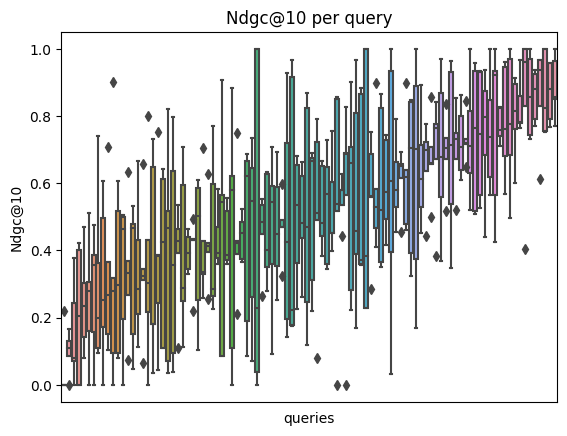

query_id  TCT-ColBERTv2      ance      bm25  bm25+rm3     marqo  \
71  query-73       0.000000  0.000000  0.000000  0.000000  0.218407   
96  query-96       0.085143  0.167253  0.128938  0.110414  0.000000   
42  query-47       0.243102  0.071010  0.378476  0.078398  0.000000   
87  query-88       0.000000  0.000000  0.204834  0.422575  0.400538   
6   query-14       0.304386  0.470485  0.142019  0.078398  0.233690   

                            query      mean  
71           yakamein noodle soup  0.043681  
96     a grilled filling sandwich  0.098350  
42  a recipe with a whole chicken  0.154197  
87                 a savory bagel  0.205589  
6               a romantic dinner  0.245795

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

analysis_folder = "/home/ubuntu/task-search-quality/measurements/cooking/analysis/non-t5-results"

files = os.listdir(analysis_folder)

for file in files:
    
    # print(file)
    filepath = os.path.join(analysis_folder, file)
    df = pd.read_csv(filepath) # index_col="query_id"
    df["mean"] = df.mean(axis=1, numeric_only=True)
    df = df.sort_values(by=["mean"], ascending=True)
    # print(df.columns)
    df_T = df[df.columns[1:-2]].T
    # print(df_T)
    sns.boxplot(data=df_T)
    
    y_label = file.split(".")[0]
    
    plt.title(f"{y_label} per query")
    plt.ylabel(y_label)
    plt.xlabel("queries")
    plt.xticks([])
    plt.show()

df.head()

Ndgc@3.csv
TCT-ColBERTv2    0.102530
ance             0.137199
bm25             0.103175
bm25+rm3         0.028964
marqo            0.000000
mean             0.074374
dtype: float64
MAP.csv
TCT-ColBERTv2    0.057013
ance             0.040558
bm25             0.080885
bm25+rm3         0.058259
marqo            0.085506
mean             0.064444
dtype: float64
Ndgc@5.csv
TCT-ColBERTv2    0.197770
ance             0.220936
bm25             0.111232
bm25+rm3         0.013121
marqo            0.027727
mean             0.114157
dtype: float64
Ndgc@10.csv
TCT-ColBERTv2    0.126526
ance             0.141749
bm25             0.170853
bm25+rm3         0.137957
marqo            0.170527
mean             0.149523
dtype: float64
Ndgc@3.csv
TCT-ColBERTv2    0.133945
ance             0.368599
bm25             0.131196
bm25+rm3         0.126214
marqo            0.082124
mean             0.168416
dtype: float64
MAP.csv
TCT-ColBERTv2    0.109888
ance             0.081383
bm25             0.073651
bm25+r

/tmp/ipykernel_2053/2154698293.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


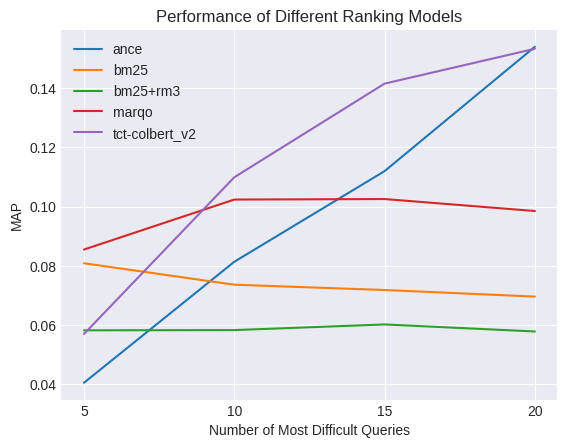

/tmp/ipykernel_2053/2154698293.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


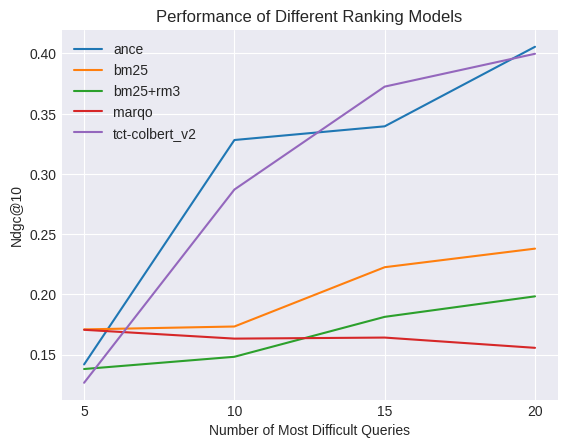

/tmp/ipykernel_2053/2154698293.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


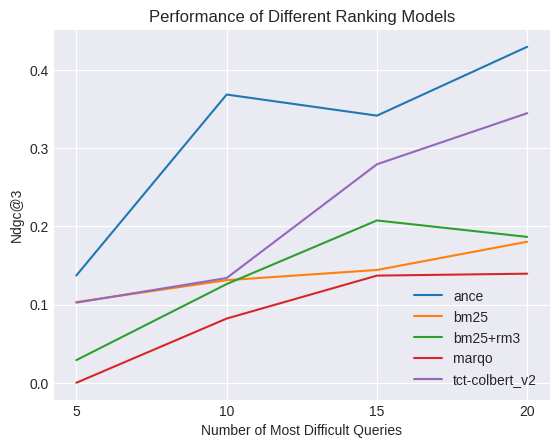

/tmp/ipykernel_2053/2154698293.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


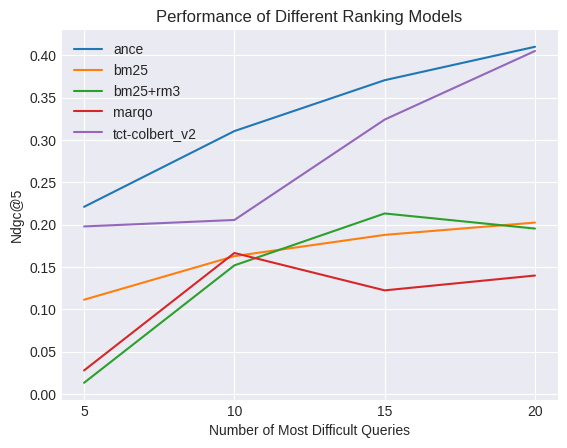

In [21]:
analysis_folder = "/home/ubuntu/task-search-quality/measurements/cooking/analysis/non-t5-results"

files = os.listdir(analysis_folder)

results = {}

thresholds = [5,10, 15,20]

for threshold in thresholds:
    for file in files:
        
        # print(file)
        if "Recall" in file:
            continue
        filepath = os.path.join(analysis_folder, file)
        df = pd.read_csv(filepath) # index_col="query_id"
        df["mean"] = df.mean(axis=1, numeric_only=True)
        df = df.sort_values(by=["mean"], ascending=True)
        hardest_10 = df.head(threshold)
        hardest_10 = hardest_10.drop(columns = ["query_id", "query"])
        hardest_10.mean()
        print(file)
        print(hardest_10.mean())
        results[(threshold, file.split('.')[0])] = hardest_10.mean()


res = []
for threshold, vals in results.items():
        res.append({
            "metric": threshold[1],
            "threshold": threshold[0],
            "ance": vals["ance"],        
            "bm25": vals["bm25"],       
            "bm25+rm3": vals["bm25+rm3"],      
            "marqo": vals["marqo"],        
            "tct-colbert_v2": vals["TCT-ColBERTv2"],        
        })
df_hardest = pd.DataFrame(res)
df_hardest.sort_values(by="metric", inplace=True)
df_hardest.head()


import matplotlib.pyplot as plt

for metric in df_hardest["metric"].unique():
    df = df_hardest[df_hardest["metric"] == metric]
    # set the plot style
    plt.style.use('seaborn-darkgrid')
    # plot the line plot
    for model in df.columns[2:]:
        plt.plot(df["threshold"], df[model], label=model)

    plt.xticks([5, 10, 15, 20])
    plt.ylabel(df["metric"].iloc[0])
    plt.xlabel("Number of Most Difficult Queries")
    # set the title
    plt.title("Performance of Different Ranking Models")
    # add the legend
    plt.legend()
    # show the plot
    plt.show()

/tmp/ipykernel_2053/2781323171.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


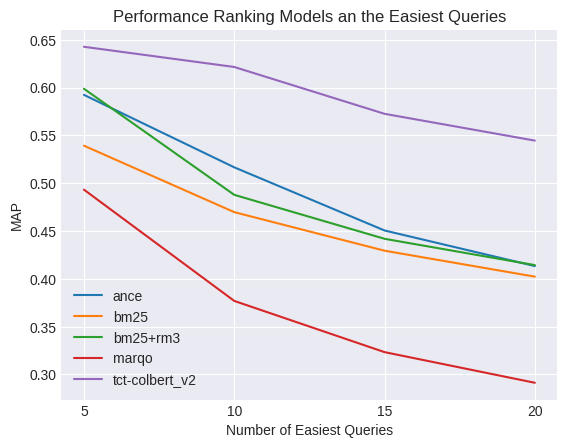

/tmp/ipykernel_2053/2781323171.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


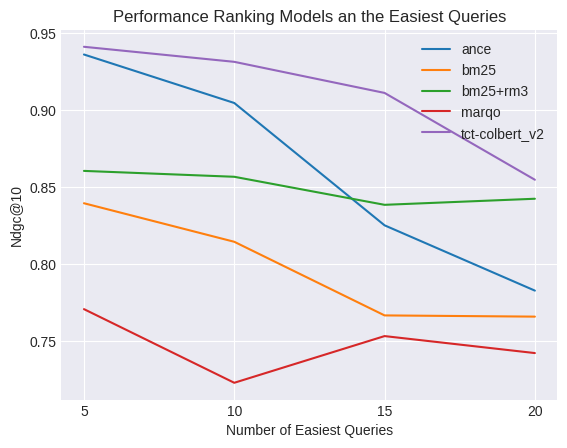

/tmp/ipykernel_2053/2781323171.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


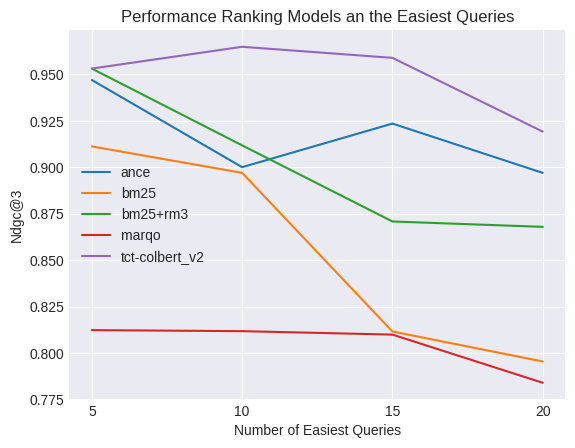

/tmp/ipykernel_2053/2781323171.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


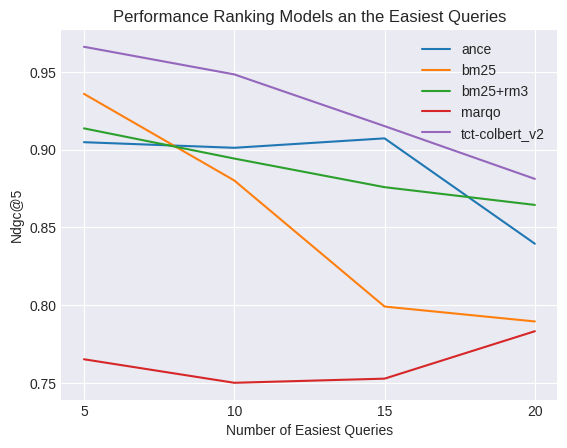

In [22]:
analysis_folder = "/home/ubuntu/task-search-quality/measurements/cooking/analysis/non-t5-results"

files = os.listdir(analysis_folder)

results = {}

# thresholds = range(1,21)
thresholds = [5,10,15,20]

for threshold in thresholds:
    for file in files:
        
        # print(file)
        if "Recall" in file:
            continue
        filepath = os.path.join(analysis_folder, file)
        df = pd.read_csv(filepath) # index_col="query_id"
        df["mean"] = df.mean(axis=1, numeric_only=True)
        df = df.sort_values(by=["mean"], ascending=True)
        easiest = df.tail(threshold)
        easiest = easiest.drop(columns = ["query_id", "query"])
        easiest.mean()
        # print(file)
        # print(easiest.mean())
        results[(threshold, file.split('.')[0])] = easiest.mean()

res = []
for threshold, vals in results.items():
        res.append({
            "metric": threshold[1],
            "threshold": threshold[0],
            "ance": vals["ance"],        
            "bm25": vals["bm25"],       
            "bm25+rm3": vals["bm25+rm3"],      
            "marqo": vals["marqo"],        
            "tct-colbert_v2": vals["TCT-ColBERTv2"],        
        })
df_hardest = pd.DataFrame(res)
df_hardest.sort_values(by="metric", inplace=True)
df_hardest.head()


import matplotlib.pyplot as plt

for metric in df_hardest["metric"].unique():
    df = df_hardest[df_hardest["metric"] == metric]
    # set the plot style
    plt.style.use('seaborn-darkgrid')
    # plot the line plot
    for model in df.columns[2:]:
        plt.plot(df["threshold"], df[model], label=model)

    plt.xticks([5, 10, 15, 20])
    plt.ylabel(df["metric"].iloc[0])
    plt.xlabel("Number of Easiest Queries")
    # set the title
    plt.title("Performance Ranking Models an the Easiest Queries")
    # add the legend
    plt.legend()
    # show the plot
    plt.show()